In [22]:
import numpy as np,pandas as pd,os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
dfm=pd.read_csv(r'Salary_Data.csv')
dfm

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


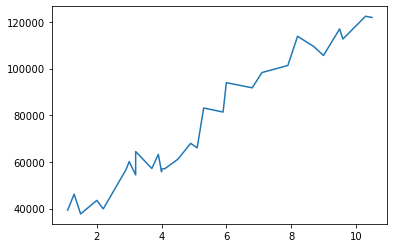

In [2]:
plt.plot(dfm.YearsExperience,dfm.Salary)

In [3]:
x=dfm.iloc[0:,0:1].values
y=dfm.iloc[:,-1:].values


In [4]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3)
from sklearn.linear_model import LinearRegression as lr
rg=lr().fit(x_train,y_train)
y_pred= rg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100


98.19448958358169

[[108460.11566705]
 [ 61363.34527814]
 [ 45350.44334591]
 [ 56653.66823925]
 [ 82085.92424926]
 [125414.95300706]
 [100924.63240482]
 [ 53827.86201592]
 [ 64189.15150148]]


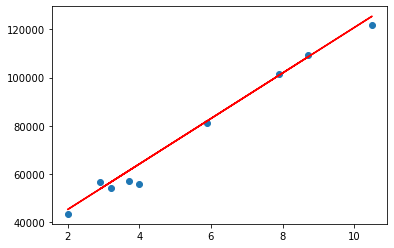

In [5]:
y_pred= rg.predict(x_test)
print(y_pred)
y_prd= rg.predict([[25]])
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')

In [6]:
r2_score(pd.DataFrame(x_test),pd.DataFrame(y_pred))

-852760462.2479794

In [7]:
pd.concat([pd.DataFrame(x_test),pd.DataFrame(y_test),pd.DataFrame(y_pred.astype(np.int32))],axis=1)

,0,0,0
0,8.7,109431,108460
1,3.7,57189,61363
2,2.0,43525,45350
3,3.2,54445,56653
4,5.9,81363,82085
5,10.5,121872,125414
6,7.9,101302,100924
7,2.9,56642,53827
8,4.0,55794,64189


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

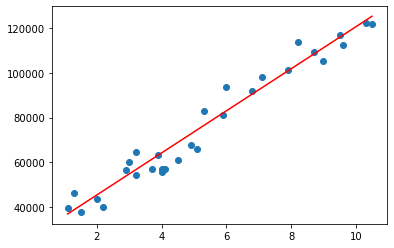

In [8]:
plt.scatter(x,y)
plt.plot(x,rg.predict(x),'r')
x

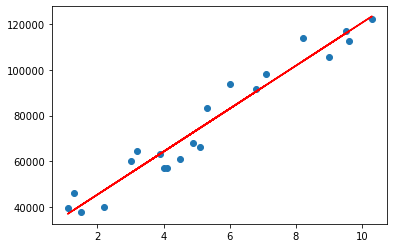

In [9]:
plt.scatter(x_train,y_train)
plt.plot(x_train,rg.predict(x_train),'r')

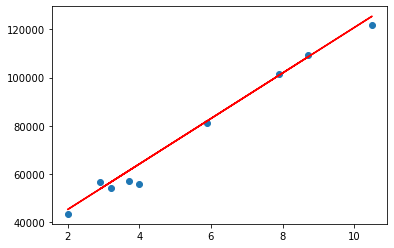

In [10]:
plt.scatter(x_test,y_test)
plt.plot(x_test,rg.predict(x_test),'r')

In [11]:
mx=pd.DataFrame(x,columns=['Experience in Years'])
my=pd.DataFrame(y,columns=['Salary'])
rs=pd.DataFrame(rg.predict(x).astype(np.int32),columns=["Predicted Salary"])
rd=pd.DataFrame((y-rg.predict(x).astype(np.int32)),columns=[" Predicted Salary vs Actual Salary"])
r=pd.concat([mx,my,rs,rd],axis=1)
r.to_csv('PredictedSalary.csv')

In [12]:
r2_score(y,rg.predict(x))*100

95.65197266040252

In [14]:
r2_score(y,rg.predict(x))*100

95.65197266040252

In [15]:
r.loc[len(r.index)] = ["Accuracy","","",str(r2_score(y,rg.predict(x))*100)+'%'] 
display(r)

,Experience in Years,Salary,Predicted Salary,Predicted Salary vs Actual Salary
0,1.1,39343,36873,2470
1,1.3,46205,38756,7449
2,1.5,37731,40640,-2909
3,2,43525,45350,-1825
4,2.2,39891,47234,-7343
5,2.9,56642,53827,2815
6,3,60150,54769,5381
7,3.2,54445,56653,-2208
8,3.2,64445,56653,7792
9,3.7,57189,61363,-4174


In [16]:
len(r.index)

31

In [19]:
r.to_csv('PredictedSalary.csv',index=False)

In [20]:
rg.intercept_

array([26511.73519035])

In [21]:
rg.coef_

array([[9419.35407778]])